In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils.dataset import get_dataloaders
from utils.metrics import evaluate_model

from models.vgg import CustomVGG
from models.resnet import CustomResNet
from models.mobilenet import CustomMobileNet
from models.inception import CustomInception
from models.densenet import CustomDenseNet
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
data_dir = r'C:\School\Term 8\Computer vision\Assignments\4\Pets\Master Folder'
train_loader, val_loader, class_names = get_dataloaders(data_dir)
num_classes = len(class_names)


In [3]:
model_map = {
    'vgg': CustomVGG,
    'resnet': CustomResNet,
    'mobilenet': CustomMobileNet,
    'inception': CustomInception,
    'densenet': CustomDenseNet
}
model_name = 'resnet'  # Change to any: vgg, resnet, mobilenet, inception, densenet
model = model_map[model_name](num_classes=num_classes).to(device)


In [4]:
epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
best_acc = 0
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss:.4f}")
    report, _ = evaluate_model(model, val_loader, device, class_names)
    print("\nValidation Report:\n")
    print(report)

Epoch 1/10 - Loss: 49.4737

Validation Report:

              precision    recall  f1-score   support

       Angry     0.5000    0.2222    0.3077         9
       Other     0.1667    0.6667    0.2667         6
         Sad     0.1667    0.1000    0.1250        10
       happy     0.5000    0.0909    0.1538        11

    accuracy                         0.2222        36
   macro avg     0.3333    0.2699    0.2133        36
weighted avg     0.3519    0.2222    0.2031        36

Epoch 2/10 - Loss: 43.0916


c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Validation Report:

              precision    recall  f1-score   support

       Angry     0.3636    0.4444    0.4000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.1364    0.3000    0.1875        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.1944        36
   macro avg     0.1250    0.1861    0.1469        36
weighted avg     0.1288    0.1944    0.1521        36

Epoch 3/10 - Loss: 43.4929

Validation Report:

              precision    recall  f1-score   support

       Angry     0.3000    0.3333    0.3158         9
       Other     0.1429    0.1667    0.1538         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4667    0.6364    0.5385        11

    accuracy                         0.3056        36
   macro avg     0.2274    0.2841    0.2520        36
weighted avg     0.2414    0.3056    0.2691        36

Epoch 4/10 - Loss: 41.7349

Validation Report:

             

c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Validation Report:

              precision    recall  f1-score   support

       Angry     0.2857    0.2222    0.2500         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2500    0.4000    0.3077        10
       happy     0.6154    0.7273    0.6667        11

    accuracy                         0.3889        36
   macro avg     0.2878    0.3374    0.3061        36
weighted avg     0.3289    0.3889    0.3517        36

Epoch 8/10 - Loss: 39.9360

Validation Report:

              precision    recall  f1-score   support

       Angry     0.3333    0.6667    0.4444         9
       Other     0.1818    0.3333    0.2353         6
         Sad     0.1667    0.1000    0.1250        10
       happy     1.0000    0.0909    0.1667        11

    accuracy                         0.2778        36
   macro avg     0.4205    0.2977    0.2429        36
weighted avg     0.4655    0.2778    0.2360        36

Epoch 9/10 - Loss: 39.5118

Validation Report:

             

Model saved as best_model_resnet.pth


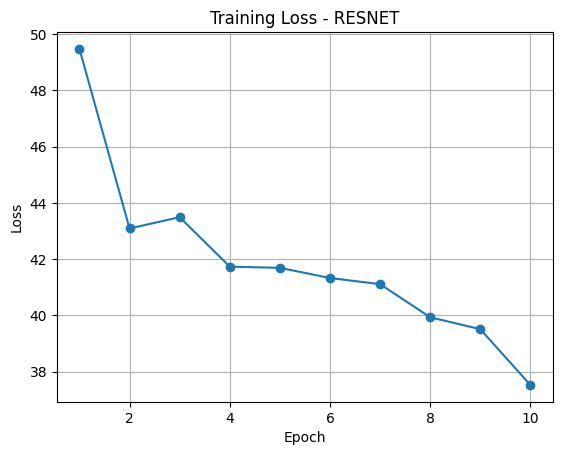

In [5]:
torch.save(model.state_dict(), f'best_model_{model_name}.pth')
print(f"Model saved as best_model_{model_name}.pth")

# 📈 6. Plot Loss Curve
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title(f"Training Loss - {model_name.upper()}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()